<a href="https://colab.research.google.com/github/Rushinalawade/Transportation-Demand-Prediction/blob/main/Transportation_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name**

##### **Project Type**    -Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Rushikesh Nalawade

# **Project Summary -**

Online ticket booking is growing popularity in this model time. Hence business need to predict the number passengers accurately to meet demand and supply gap.Transportation Demand analysis is an key factor to predict number of passengers using transportation and hence help business to achieve their goals. As a business we need to meet the demands of vehicle for passengers, nothing more nor less and increase the profitibilty of company. In transportation analysis generally parameters like date, time, day, holidays, weather, weekends etc are taken in consideration.

# **Problem Statement**

The challenge is to build a model which predict number of seats that mobiticket is expected to sell per ride i.e. on specific route, specific date and time

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Almabetter/Notebook/train_revised.csv')

Mounted at /content/drive


In [ ]:
# Dataset First Look
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
# Dataset Rows & Columns count
df.shape

(51645, 10)

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

<Axes: >

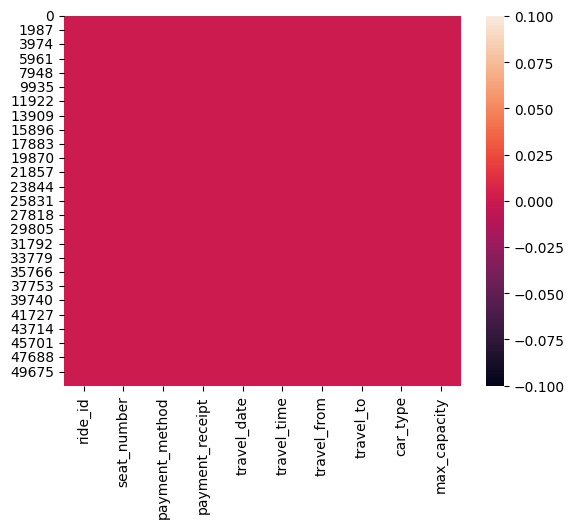

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull())

Dataset is records of ticket booking. Here we have 51645 rows and 10 columns. Generally column is seen to have categorical variable and date, no numerical data is present. There are no duplicate and null values in dataset

In [ ]:
# Dataset Columns
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN
top,NaN,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
50%,10353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000


In [ ]:
# Check Unique Values for each variable.
colm = df.columns
for col in colm:
  value = df[col].nunique()
  print(f'The {col} has {value} unique entries.')

The ride_id has 6249 unique entries.
The seat_number has 61 unique entries.
The payment_method has 2 unique entries.
The payment_receipt has 51645 unique entries.
The travel_date has 149 unique entries.
The travel_time has 78 unique entries.
The travel_from has 17 unique entries.
The travel_to has 1 unique entries.
The car_type has 2 unique entries.
The max_capacity has 2 unique entries.


<h2> Lets Prepare data

In [ ]:
# Making Dataset groupby ride_id.
df_grp_id = df.groupby('ride_id')[['travel_date','travel_time','travel_from','travel_to','car_type','max_capacity']].agg('max')

# Adding passenger count in each ride column.
passenger_countdf = df['ride_id'].value_counts().to_frame('passenger_count').rename_axis('Index')
df_new = pd.concat([df_grp_id,passenger_countdf],axis=1)

# Adding weekday name column.
def get_weekday(date_str):
  date = datetime.strptime(date_str,'%d-%m-%y')
  day = date.strftime('%A')
  return day

df_new['week_day'] = df_new['travel_date'].apply(lambda x: get_weekday(x))

# Adding column occupied ratio:
df_new['occupied_ratio'] = (df_new['passenger_count']/df_new['max_capacity'])*100

# Converting continous time column into 2 hours bin.
def get_bin(time_str):
  time = int(time_str[:-3])
  if(time in (5,6)):
    return '5am to 7am'
  elif(time in (7,8)):
    return '7am to 9am'
  elif(time in (9,10,11)):
    return '9am to 12am'
  elif(time in (19,20,21,22,23,24)):
    return '7pm to midnight'
  else:
    return 'Afternoon'

df_new['time_bin'] = df_new['travel_time'].apply(lambda x: get_bin(x))

In [ ]:
df_new['date'] = df_new['travel_date'].apply(lambda x: datetime.strptime(x,'%d-%m-%y'))

In [ ]:
# Adding new date features
date = df_new['date']
df_new['year'] = date.dt.year
df_new['month'] = date.dt.month
df_new['day_of_year'] = date.dt.dayofyear
df_new['day_of_month'] = date.dt.day
df_new['day_of_week'] = date.dt.dayofweek
df_new['week_of_year'] = date.dt.weekofyear
df_new['is_weekend'] = date.dt.weekday//4
df_new['is_month_start'] = date.dt.is_month_start.astype(int)
df_new['is_month_end'] = date.dt.is_month_end.astype(int)

In [ ]:
df_new.head()

,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,passenger_count,week_day,occupied_ratio,time_bin,date,year,month,day_of_year,day_of_month,day_of_week,week_of_year,is_weekend,is_month_start,is_month_end
1442,17-10-17,7:15,Migori,Nairobi,Bus,49,1,Tuesday,2.040816,7am to 9am,2017-10-17,2017,10,290,17,1,42,0,0,0
5437,19-11-17,7:12,Migori,Nairobi,Bus,49,1,Sunday,2.040816,7am to 9am,2017-11-19,2017,11,323,19,6,46,1,0,0
5710,26-11-17,7:05,Keroka,Nairobi,Bus,49,1,Sunday,2.040816,7am to 9am,2017-11-26,2017,11,330,26,6,47,1,0,0
5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5,Monday,10.204082,7am to 9am,2017-11-27,2017,11,331,27,0,48,0,0,0
5778,27-11-17,7:12,Migori,Nairobi,Bus,49,31,Monday,63.265306,7am to 9am,2017-11-27,2017,11,331,27,0,48,0,0,0


In [ ]:
df_new[['hour','minutes']] = df_new.travel_time.str.split(':',expand=True)

In [ ]:
df_new.head()

,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,passenger_count,week_day,occupied_ratio,time_bin,...,month,day_of_year,day_of_month,day_of_week,week_of_year,is_weekend,is_month_start,is_month_end,hour,minutes
1442,17-10-17,7:15,Migori,Nairobi,Bus,49,1,Tuesday,2.040816,7am to 9am,...,10,290,17,1,42,0,0,0,7,15
5437,19-11-17,7:12,Migori,Nairobi,Bus,49,1,Sunday,2.040816,7am to 9am,...,11,323,19,6,46,1,0,0,7,12
5710,26-11-17,7:05,Keroka,Nairobi,Bus,49,1,Sunday,2.040816,7am to 9am,...,11,330,26,6,47,1,0,0,7,05
5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5,Monday,10.204082,7am to 9am,...,11,331,27,0,48,0,0,0,7,10
5778,27-11-17,7:12,Migori,Nairobi,Bus,49,31,Monday,63.265306,7am to 9am,...,11,331,27,0,48,0,0,0,7,12


In [ ]:
df_new['hour'] = df_new['hour'].astype(int)
df_new['minutes'] = df_new['minutes'].astype(int)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 1442 to 20117
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   travel_date      6249 non-null   object        
 1   travel_time      6249 non-null   object        
 2   travel_from      6249 non-null   object        
 3   travel_to        6249 non-null   object        
 4   car_type         6249 non-null   object        
 5   max_capacity     6249 non-null   int64         
 6   passenger_count  6249 non-null   int64         
 7   week_day         6249 non-null   object        
 8   occupied_ratio   6249 non-null   float64       
 9   time_bin         6249 non-null   object        
 10  date             6249 non-null   datetime64[ns]
 11  year             6249 non-null   int64         
 12  month            6249 non-null   int64         
 13  day_of_year      6249 non-null   int64         
 14  day_of_month     6249 non-null   int

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_new = df_new.sort_values(by=['date','hour','minutes'],ascending=[True,True,True])
df_new.head(20)

,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,passenger_count,week_day,occupied_ratio,time_bin,date,year,month,day_of_year,day_of_month,day_of_week,week_of_year,is_weekend,is_month_start,is_month_end,hour,minutes
1442,17-10-17,7:15,Migori,Nairobi,Bus,49,1,Tuesday,2.040816,7am to 9am,2017-10-17,2017,10,290,17,1,42,0,0,0,7,15
14304,14-11-17,5:10,Kisii,Nairobi,Bus,49,1,Tuesday,2.040816,5am to 7am,2017-11-14,2017,11,318,14,1,46,0,0,0,5,10
5437,19-11-17,7:12,Migori,Nairobi,Bus,49,1,Sunday,2.040816,7am to 9am,2017-11-19,2017,11,323,19,6,46,1,0,0,7,12
5710,26-11-17,7:05,Keroka,Nairobi,Bus,49,1,Sunday,2.040816,7am to 9am,2017-11-26,2017,11,330,26,6,47,1,0,0,7,5
13761,27-11-17,5:00,Kisii,Nairobi,shuttle,11,2,Monday,18.181818,5am to 7am,2017-11-27,2017,11,331,27,0,48,0,0,0,5,0
20117,27-11-17,5:00,Kisii,Nairobi,Bus,49,1,Monday,2.040816,5am to 7am,2017-11-27,2017,11,331,27,0,48,0,0,0,5,0
13742,27-11-17,5:20,Kisii,Nairobi,shuttle,11,1,Monday,9.090909,5am to 7am,2017-11-27,2017,11,331,27,0,48,0,0,0,5,20
13760,27-11-17,5:50,Kisii,Nairobi,shuttle,11,1,Monday,9.090909,5am to 7am,2017-11-27,2017,11,331,27,0,48,0,0,0,5,50
13757,27-11-17,6:20,Kisii,Nairobi,shuttle,11,1,Monday,9.090909,5am to 7am,2017-11-27,2017,11,331,27,0,48,0,0,0,6,20
5898,27-11-17,6:30,Keroka,Nairobi,shuttle,11,1,Monday,9.090909,5am to 7am,2017-11-27,2017,11,331,27,0,48,0,0,0,6,30


In [ ]:
df_new.groupby('week_day')['passenger_count'].agg('sum').transform(lambda x: x/x.sum()*100).to_frame().sort_values(by='passenger_count',ascending=False).reset_index().rename(columns={'passenger_count':'% of passenger'})

,week_day,% of passenger
0,Friday,17.604802
1,Wednesday,15.403234
2,Thursday,15.283183
3,Sunday,15.139897
4,Tuesday,14.194985
5,Monday,13.807726
6,Saturday,8.566173


In [ ]:
df_new.groupby('travel_from')['passenger_count'].agg('sum').transform(lambda x: x/x.sum()*100).to_frame().sort_values(by='passenger_count',ascending=False).reset_index().rename(columns={'passenger_count':'% of passenger'})

,travel_from,% of passenger
0,Kisii,43.773841
1,Migori,13.606351
2,Homa Bay,12.206409
3,Sirare,8.614580
4,Rongo,7.605770
5,Kehancha,3.696389
6,Awendo,3.462097
7,Kijauri,1.996321
8,Keroka,1.913060
9,Nyachenge,0.991383


In [ ]:
df_new.groupby('travel_from')['occupied_ratio'].agg('mean').to_frame().sort_values(by='occupied_ratio',ascending=False).reset_index()

,travel_from,occupied_ratio
0,Kisii,58.163572
1,Sirare,47.537130
2,Migori,37.152374
3,Mbita,36.734694
4,Homa Bay,36.138500
5,Kehancha,22.650688
6,Ndhiwa,21.892393
7,Keroka,21.082489
8,Awendo,19.724214
9,Rodi,16.206483


In [ ]:
df_new.groupby('hour')['occupied_ratio'].agg('mean').to_frame().sort_values(by='hour').reset_index()

,hour,occupied_ratio
0,5,27.627765
1,6,38.656620
2,7,25.782238
3,8,64.049873
4,9,68.777943
5,10,68.741603
6,11,64.785789
7,19,39.628118
8,23,16.460355


In [ ]:
df_new.groupby('time_bin')['passenger_count'].agg('sum').transform(lambda x: x/x.sum()*100).to_frame().sort_values(by='passenger_count',ascending=False).reset_index().rename(columns={'passenger_count':'% of passenger'})

,time_bin,% of passenger
0,7am to 9am,65.667538
1,9am to 12am,17.265950
2,7pm to midnight,9.412334
3,5am to 7am,7.654178


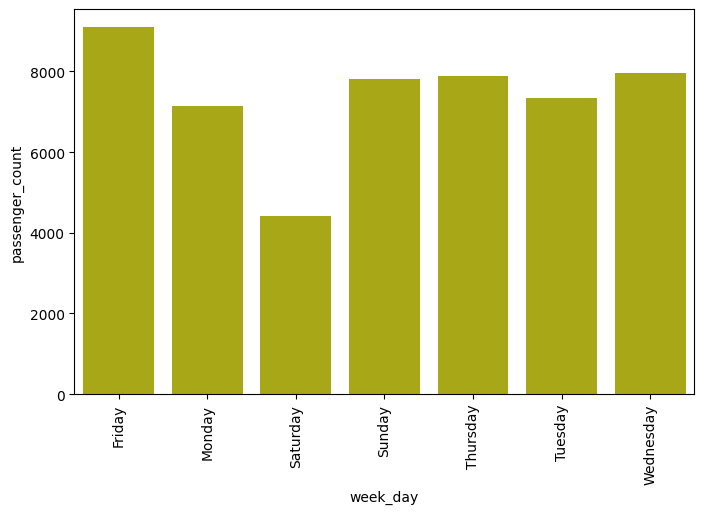

In [ ]:
fdf = df_new.groupby('week_day')['passenger_count'].agg('sum').to_frame().sort_values(by='week_day').reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='week_day',y='passenger_count',data=fdf,color='y')
plt.xticks(rotation = 90)
plt.show()

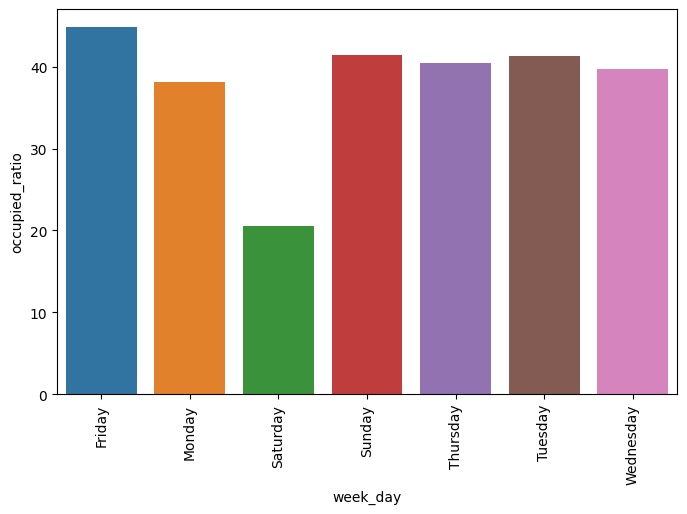

In [ ]:
fdf = df_new.groupby('week_day')['occupied_ratio'].agg('mean').to_frame().sort_values(by='week_day').reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='week_day',y='occupied_ratio',data=fdf)
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='occupied_ratio', ylabel='Count'>

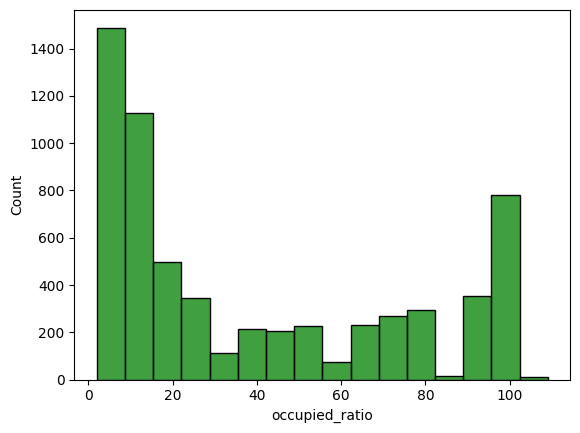

In [ ]:
sns.histplot(df_new['occupied_ratio'],color='g')

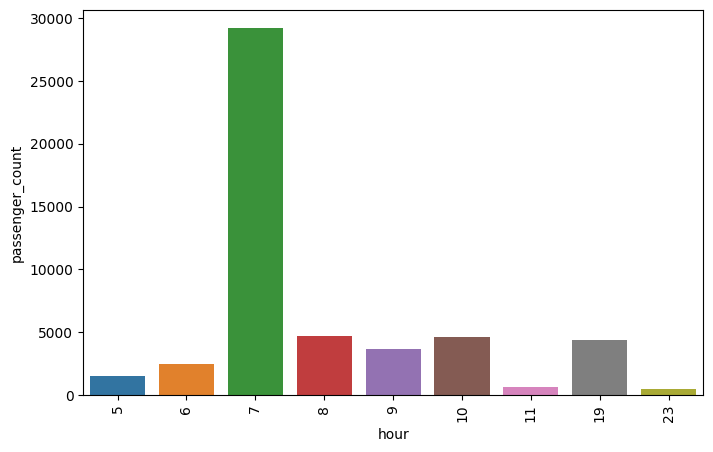

In [ ]:
fdf = df_new.groupby('hour')['passenger_count'].agg('sum').to_frame().sort_values(by='hour').reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='hour',y='passenger_count',data=fdf)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
fdf = df_new.groupby('day_of_month')['passenger_count'].agg('sum').to_frame().sort_values(by='day_of_month').reset_index()
fdf
# plt.figure(figsize=(8,5))
# sns.barplot(x='day_of_month',y='passenger_count',data=fdf)
# plt.xticks(rotation = 90)
# plt.show()

,day_of_month,passenger_count
0,1,1664
1,2,1541
2,3,1102
3,4,1972
4,5,1810
5,6,1953
6,7,2150
7,8,2210
8,9,2225
9,10,2019


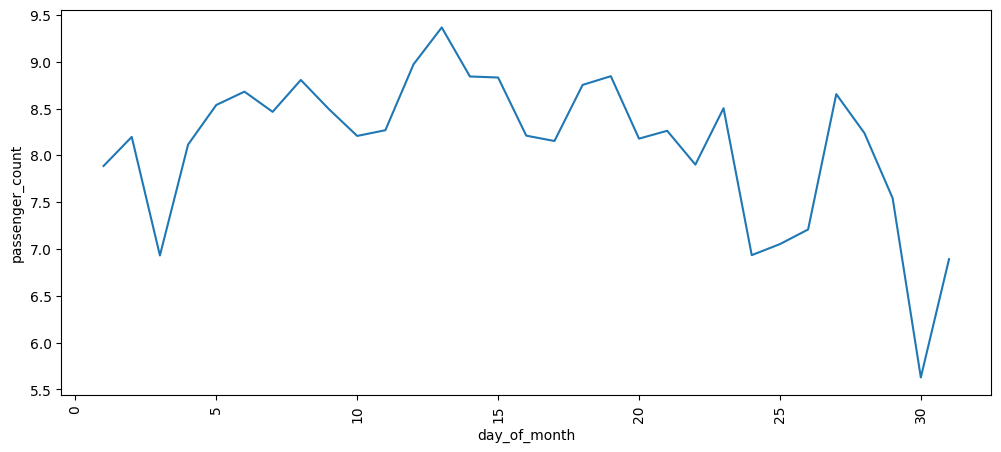

In [ ]:
fdf = df_new.groupby('day_of_month')['passenger_count'].mean().to_frame().sort_values(by='day_of_month').reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(x='day_of_month',y='passenger_count',data=fdf)
plt.xticks(rotation = 90)
plt.show()

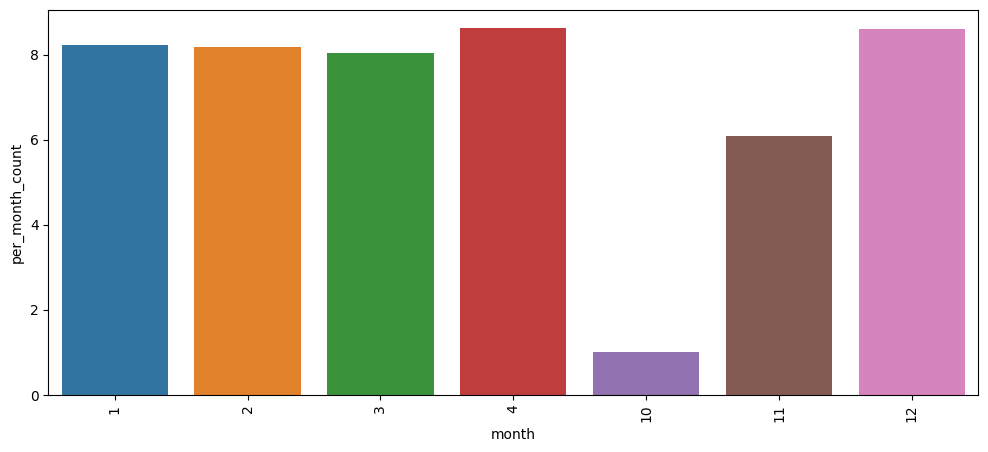

In [ ]:
fdf = df_new.groupby('month')['passenger_count','month'].agg({'passenger_count':'sum','month':'count'}).rename(columns={'month':'count_of_month'}).sort_values(by='month').reset_index()
fdf['per_month_count'] = fdf['passenger_count']/fdf['count_of_month']
fdf
plt.figure(figsize=(12,5))
sns.barplot(x='month',y='per_month_count',data=fdf)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df_new['year'].value_counts()

2018    4611
2017    1638
Name: year, dtype: int64

In [ ]:
df_new[df_new['car_type']=='Bus']['passenger_count'].sum()

31985

In [ ]:
df_new[df_new['car_type']=='shuttle']['passenger_count'].sum()

19660

In [ ]:
df_new.groupby('week_day').size()/len(df_new)

week_day
Friday       0.167707
Monday       0.135702
Saturday     0.099696
Sunday       0.147864
Thursday     0.155225
Tuesday      0.138422
Wednesday    0.155385
dtype: float64

In [ ]:
df_new['travel_from'].value_counts()

Kisii        3020
Rongo         738
Kijauri       556
Migori        386
Homa Bay      356
Keroka        312
Nyachenge     196
Sirare        191
Awendo        185
Kehancha      172
Rodi           51
Ndhiwa         22
Mbita          21
Keumbu         20
Sori           20
Oyugis          2
Kendu Bay       1
Name: travel_from, dtype: int64

In [ ]:
fdf = df_new.groupby('is_month_end')['passenger_count','is_month_end'].agg({'passenger_count':'mean'}).reset_index()
fdf

,is_month_end,passenger_count
0,0,8.299852
1,1,7.045455


In [ ]:
df_new.head()

,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,passenger_count,week_day,occupied_ratio,time_bin,date,year,month,day_of_year,day_of_month,day_of_week,week_of_year,is_weekend,is_month_start,is_month_end,hour,minutes
1442,17-10-17,7:15,Migori,Nairobi,Bus,49,1,Tuesday,2.040816,7am to 9am,2017-10-17,2017,10,290,17,1,42,0,0,0,7,15
14304,14-11-17,5:10,Kisii,Nairobi,Bus,49,1,Tuesday,2.040816,5am to 7am,2017-11-14,2017,11,318,14,1,46,0,0,0,5,10
5437,19-11-17,7:12,Migori,Nairobi,Bus,49,1,Sunday,2.040816,7am to 9am,2017-11-19,2017,11,323,19,6,46,1,0,0,7,12
5710,26-11-17,7:05,Keroka,Nairobi,Bus,49,1,Sunday,2.040816,7am to 9am,2017-11-26,2017,11,330,26,6,47,1,0,0,7,5
13761,27-11-17,5:00,Kisii,Nairobi,shuttle,11,2,Monday,18.181818,5am to 7am,2017-11-27,2017,11,331,27,0,48,0,0,0,5,0


In [ ]:
df_new = df_new[(df_new['date']>'2017-11-28')]
df_new.head()

,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,passenger_count,week_day,occupied_ratio,time_bin,date,year,month,day_of_year,day_of_month,day_of_week,week_of_year,is_weekend,is_month_start,is_month_end,hour,minutes
12725,29-11-17,5:00,Kisii,Nairobi,shuttle,11,1,Wednesday,9.090909,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,0
12443,29-11-17,5:10,Kisii,Nairobi,shuttle,11,9,Wednesday,81.818182,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,10
12707,29-11-17,5:20,Kisii,Nairobi,shuttle,11,1,Wednesday,9.090909,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,20
6132,29-11-17,5:30,Keroka,Nairobi,shuttle,11,1,Wednesday,9.090909,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,30
12445,29-11-17,5:30,Kisii,Nairobi,shuttle,11,4,Wednesday,36.363636,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,30


In [ ]:
df_new['datetime'] = df_new['date'].astype(str)+':'+df_new['hour'].astype(str)
df_new.head()

,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,passenger_count,week_day,occupied_ratio,time_bin,date,year,month,day_of_year,day_of_month,day_of_week,week_of_year,is_weekend,is_month_start,is_month_end,hour,minutes,datetime
12725,29-11-17,5:00,Kisii,Nairobi,shuttle,11,1,Wednesday,9.090909,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,0,2017-11-29:5
12443,29-11-17,5:10,Kisii,Nairobi,shuttle,11,9,Wednesday,81.818182,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,10,2017-11-29:5
12707,29-11-17,5:20,Kisii,Nairobi,shuttle,11,1,Wednesday,9.090909,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,20,2017-11-29:5
6132,29-11-17,5:30,Keroka,Nairobi,shuttle,11,1,Wednesday,9.090909,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,30,2017-11-29:5
12445,29-11-17,5:30,Kisii,Nairobi,shuttle,11,4,Wednesday,36.363636,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,30,2017-11-29:5


In [ ]:
df_grp = df_new.groupby('travel_from')

In [ ]:
city_list = list(df_new['travel_from'].unique())
city_list

['Kisii',
 'Keroka',
 'Rongo',
 'Homa Bay',
 'Migori',
 'Keumbu',
 'Kijauri',
 'Oyugis',
 'Awendo',
 'Sirare',
 'Nyachenge',
 'Kehancha',
 'Kendu Bay',
 'Sori',
 'Rodi',
 'Mbita',
 'Ndhiwa']

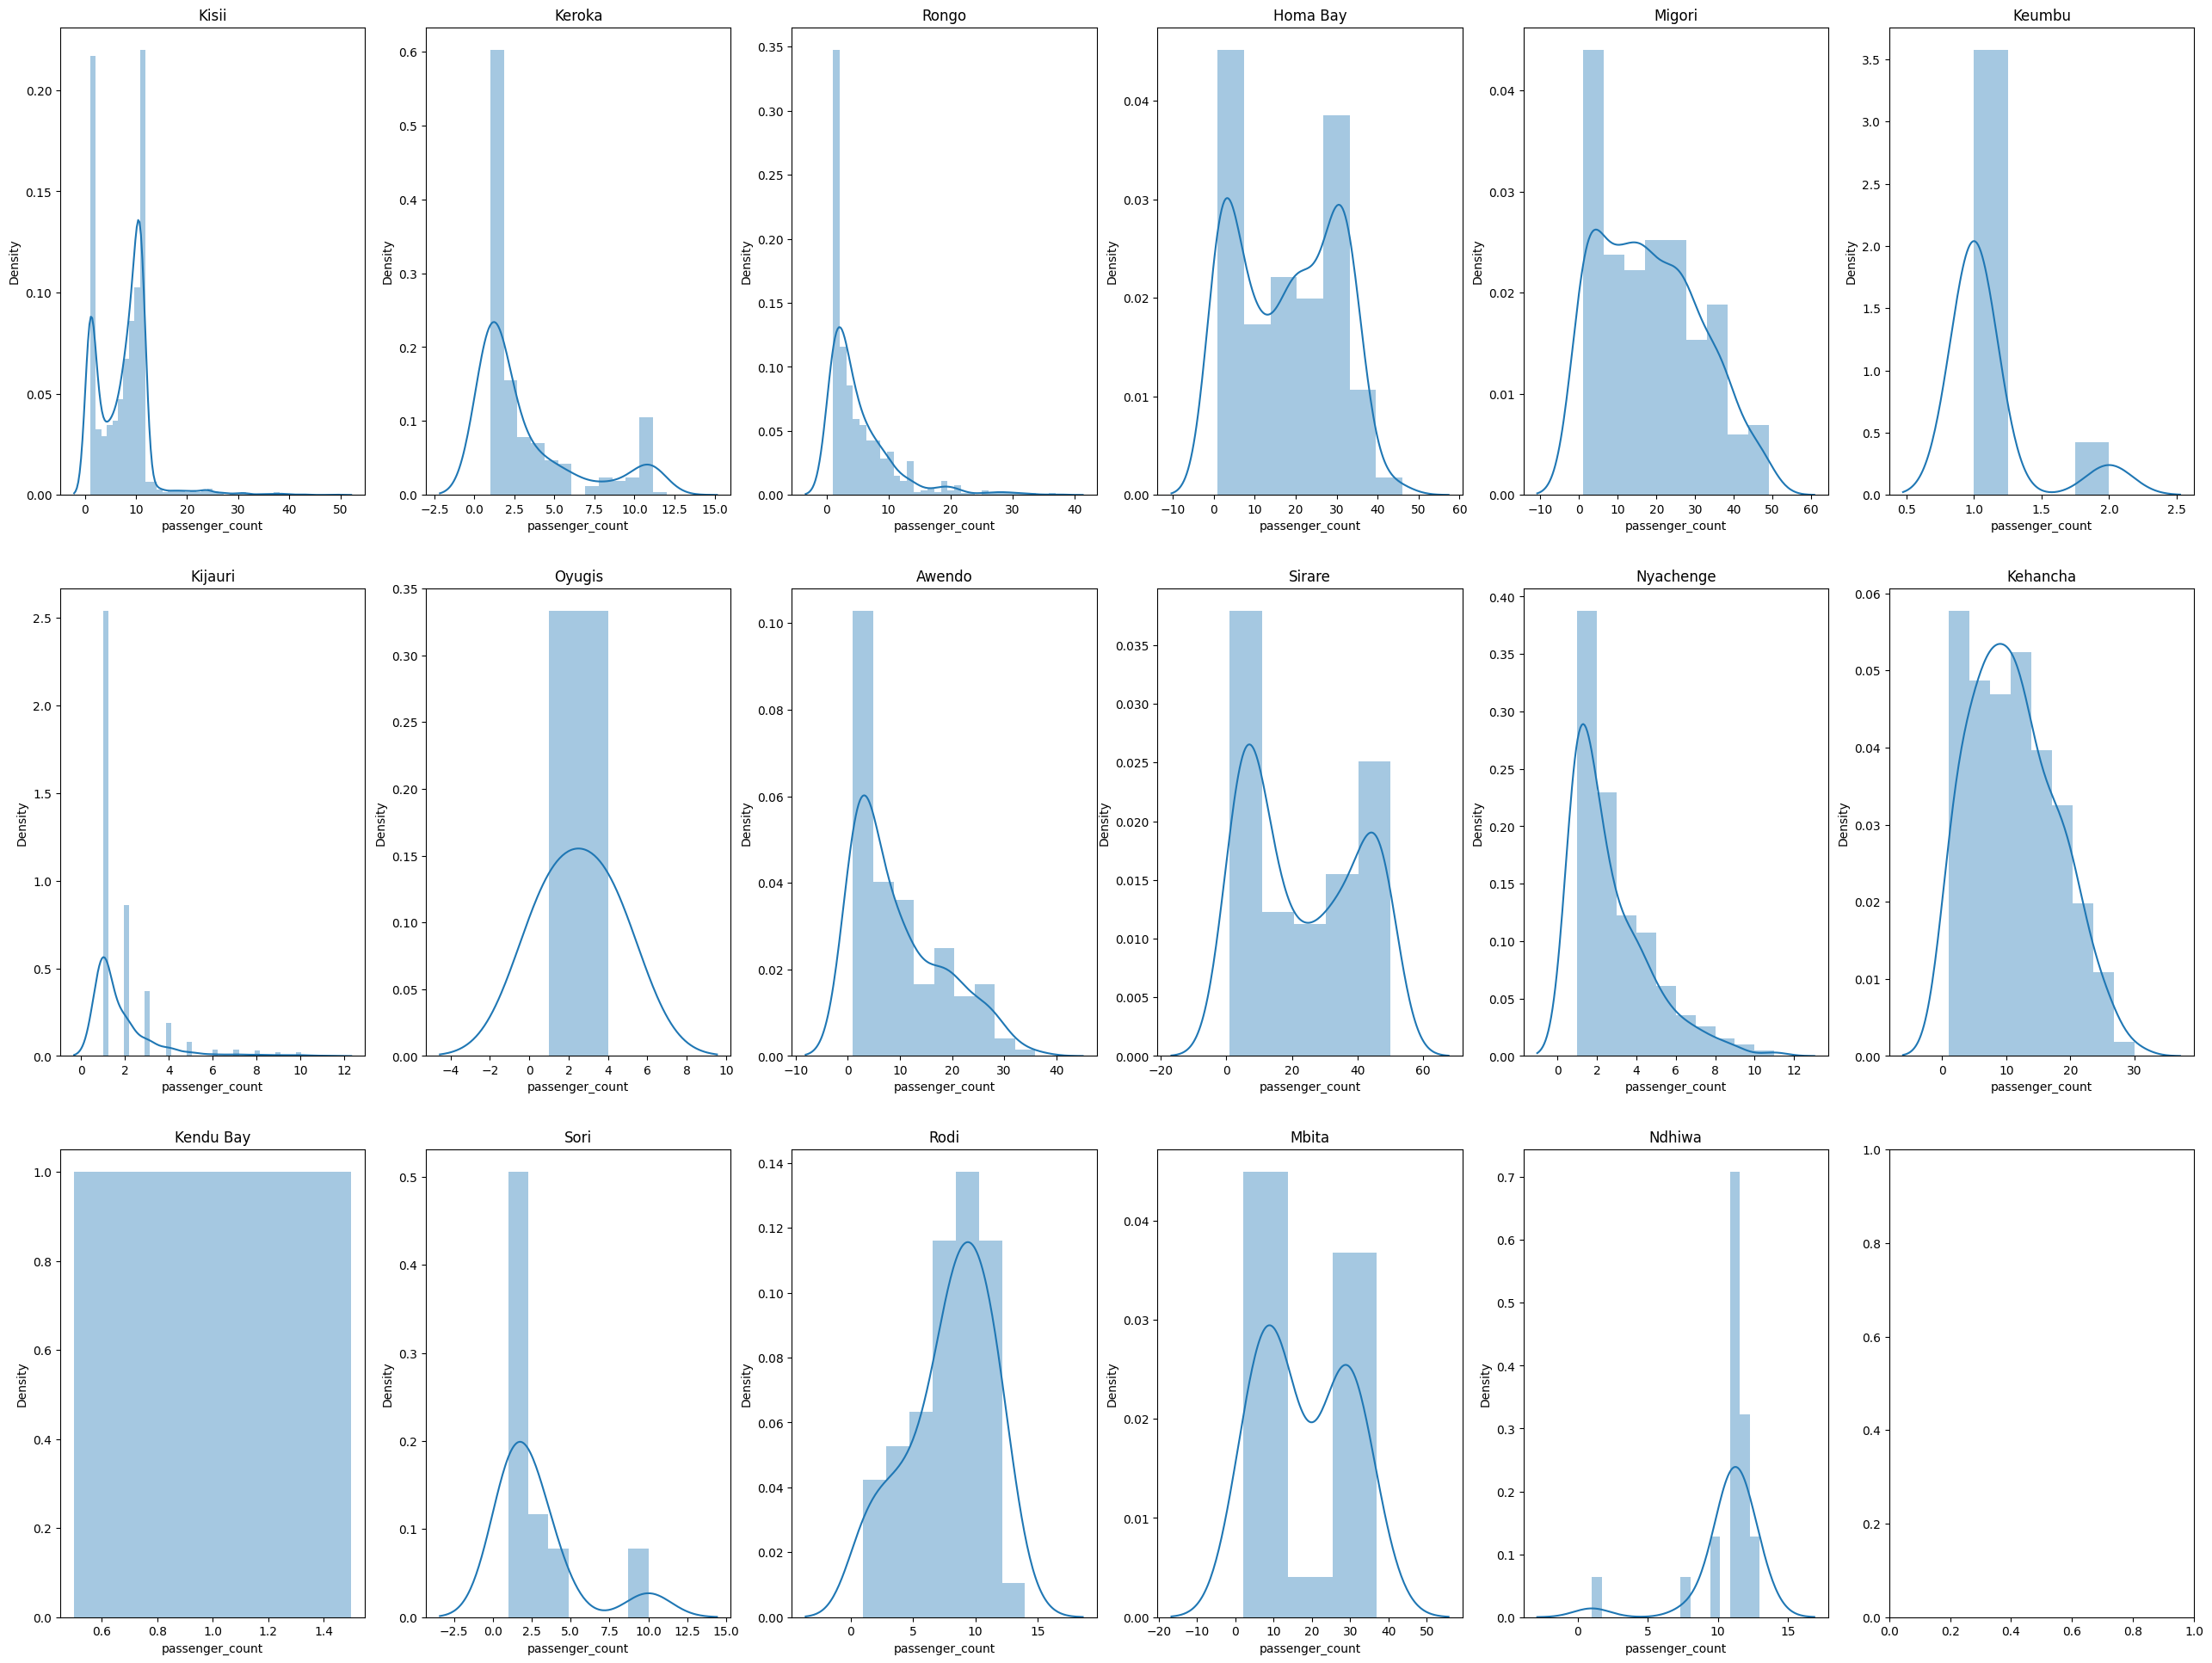

In [ ]:
fig,axs = plt.subplots(3,6,figsize=(32,24))
axs = axs.ravel()
i = 0
for city in city_list:
  axs[i].set_title(city)
  sns.distplot(df_grp.get_group(city)['passenger_count'],ax=axs[i])
  i=i+1


In [ ]:
df = {}
for city in city_list:
 df[city] = df_grp.get_group(city)

**Manipulations:**

1. We have made dataset groupby ride_id to find the passengers count per ride.

2. We have also added weekdays and and created time bins in new dataset.

3. Also, we have added ride occupied ratio as passenger_count/max_capacity in new dataset.

Now, our dataset has 6249 rows and 10 column with ride_id as index.

**Insights**:

1. Almost all passengers do payment with mepesa app(99.7%).

2. Generally the passengers count increase on Friday(17%) and decrease on Saturday(8%) and Monday(13%) where it is approx 15% daily.

3. Passenger Count increase during 7am to 9am slot i.e. approx 65% of total passengers travel between this slot.

4. Though passenger count increase in 7am to 9am slot, maximum occupied ratio can be seen in 9am to 12 am slot.

5. Kisii town has most departure and hence almost 43% of passengers departure from kissi.

6. 62 % of passengers use Bus and about 38% of passengers use Shuttle for transportation.

In [ ]:
df_ts = df['Kisii'].copy()

In [ ]:
df_ts.shape

(2957, 23)

In [ ]:
from statsmodels.tsa.stattools import adfuller
# H0 = Data is Non-Stationary
# H1 = Data is Stationary
def adfuller_test(X):
  result = adfuller(X)
  labels = ['ADF Test Statistics','p-value','#lags','Number of Observations']
  for value,label in zip(result,labels):
    print(f'{label} : {value}')
  if result[1]<0.05:
    print('Strong evidencee against Null Hypothesis. Reject Null Hypothesis. Hence Data is Stationary')
  else:
    print('Weak evidence against Null Hypothesis. Failed to reject Null Hypothesis. Hence Data is Non Stationary')

In [ ]:
adfuller_test(df_ts['passenger_count'])

ADF Test Statistics : -4.786111002873565
p-value : 5.781265712025759e-05
#lags : 28
Number of Observations : 2928
Strong evidencee against Null Hypothesis. Reject Null Hypothesis. Hence Data is Stationary


<Figure size 1200x800 with 0 Axes>

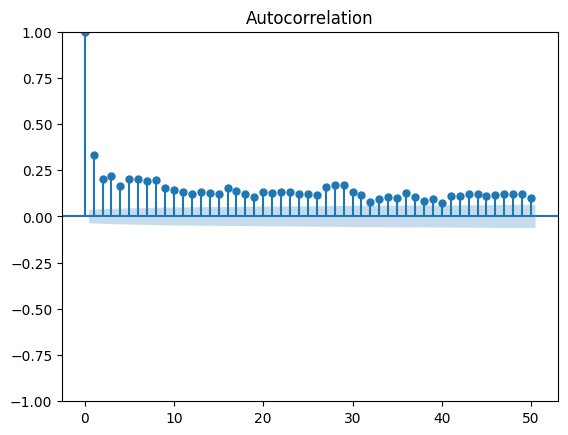

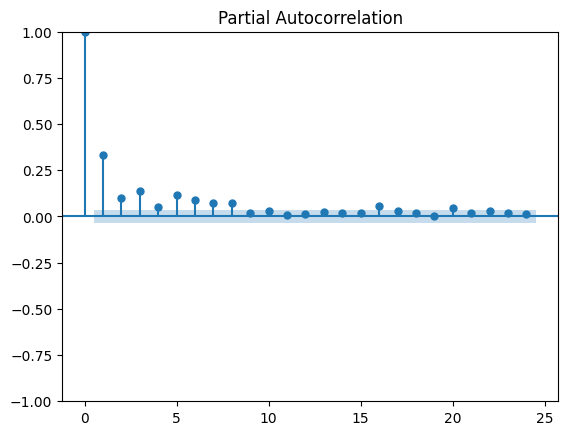

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.figure(figsize=(12,8))
plot_acf(df_ts['passenger_count'],lags=50)
plot_pacf(df_ts['passenger_count'],lags=24)
plt.show()

In [ ]:
def get_shift(df):
  df['shift1'] = df['passenger_count'].shift(1)+np.random.normal(scale=np.std(df['passenger_count']),size=1)
  df['shift2'] = df['passenger_count'].shift(2)+np.random.normal(scale=np.std(df['passenger_count']),size=1)
  df['shift3'] = df['passenger_count'].shift(3)+np.random.normal(scale=np.std(df['passenger_count']),size=1)
  df['shift4'] = df['passenger_count'].shift(4)+np.random.normal(scale=np.std(df['passenger_count']),size=1)
  df['shift5'] = df['passenger_count'].shift(5)+np.random.normal(scale=np.std(df['passenger_count']),size=1)
  df['shift6'] = df['passenger_count'].shift(6)+np.random.normal(scale=np.std(df['passenger_count']),size=1)
  df['shift7'] = df['passenger_count'].shift(7)+np.random.normal(scale=np.std(df['passenger_count']),size=1)
  return df

In [ ]:
for city in city_list:
  get_shift(df[city])

In [ ]:
df['Kisii'].head()

,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,passenger_count,week_day,occupied_ratio,time_bin,date,year,month,day_of_year,day_of_month,day_of_week,week_of_year,is_weekend,is_month_start,is_month_end,hour,minutes,datetime,shift1,shift2,shift3,shift4,shift5,shift6,shift7
12725,29-11-17,5:00,Kisii,Nairobi,shuttle,11,1,Wednesday,9.090909,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,0,2017-11-29:5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12443,29-11-17,5:10,Kisii,Nairobi,shuttle,11,9,Wednesday,81.818182,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,10,2017-11-29:5,7.124741,NaN,NaN,NaN,NaN,NaN,NaN
12707,29-11-17,5:20,Kisii,Nairobi,shuttle,11,1,Wednesday,9.090909,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,20,2017-11-29:5,15.124741,4.926379,NaN,NaN,NaN,NaN,NaN
12445,29-11-17,5:30,Kisii,Nairobi,shuttle,11,4,Wednesday,36.363636,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,30,2017-11-29:5,7.124741,12.926379,-9.361822,NaN,NaN,NaN,NaN
12652,29-11-17,5:40,Kisii,Nairobi,shuttle,11,7,Wednesday,63.636364,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,40,2017-11-29:5,10.124741,4.926379,-1.361822,-9.597837,NaN,NaN,NaN


In [ ]:
def get_rolling_mean(df):
  df['rolling_mean2'] = df['passenger_count'].rolling(window=2).mean()+np.random.normal(scale=np.std(df['passenger_count']),size=1)
  df['rolling_mean3'] = df['passenger_count'].rolling(window=3).mean()+np.random.normal(scale=np.std(df['passenger_count']),size=1)
  df['rolling_mean4'] = df['passenger_count'].rolling(window=4).mean()+np.random.normal(scale=np.std(df['passenger_count']),size=1)
  df['rolling_mean5'] = df['passenger_count'].rolling(window=5).mean()+np.random.normal(scale=np.std(df['passenger_count']),size=1)
  return df

In [ ]:
for city in city_list:
  get_rolling_mean(df[city])

In [ ]:
df['Kisii'].head()

,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,passenger_count,week_day,occupied_ratio,time_bin,date,year,month,day_of_year,day_of_month,day_of_week,week_of_year,is_weekend,is_month_start,is_month_end,hour,minutes,datetime,shift1,shift2,shift3,shift4,shift5,shift6,shift7,rolling_mean2,rolling_mean3,rolling_mean4,rolling_mean5
12725,29-11-17,5:00,Kisii,Nairobi,shuttle,11,1,Wednesday,9.090909,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,0,2017-11-29:5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12443,29-11-17,5:10,Kisii,Nairobi,shuttle,11,9,Wednesday,81.818182,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,10,2017-11-29:5,7.124741,NaN,NaN,NaN,NaN,NaN,NaN,9.789154,NaN,NaN,NaN
12707,29-11-17,5:20,Kisii,Nairobi,shuttle,11,1,Wednesday,9.090909,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,20,2017-11-29:5,15.124741,4.926379,NaN,NaN,NaN,NaN,NaN,9.789154,12.919862,NaN,NaN
12445,29-11-17,5:30,Kisii,Nairobi,shuttle,11,4,Wednesday,36.363636,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,30,2017-11-29:5,7.124741,12.926379,-9.361822,NaN,NaN,NaN,NaN,7.289154,13.919862,-1.968,NaN
12652,29-11-17,5:40,Kisii,Nairobi,shuttle,11,7,Wednesday,63.636364,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,40,2017-11-29:5,10.124741,4.926379,-1.361822,-9.597837,NaN,NaN,NaN,10.289154,13.253195,-0.468,10.316438


In [ ]:
df_new = pd.DataFrame(columns=df['Kisii'].columns)
for city in city_list:
  df_new = pd.concat([df_new,df[city]],axis=0,ignore_index=True)

In [ ]:
df_new

,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,passenger_count,week_day,occupied_ratio,time_bin,date,year,month,day_of_year,day_of_month,day_of_week,week_of_year,is_weekend,is_month_start,is_month_end,hour,minutes,datetime,shift1,shift2,shift3,shift4,shift5,shift6,shift7,rolling_mean2,rolling_mean3,rolling_mean4,rolling_mean5
0,29-11-17,5:00,Kisii,Nairobi,shuttle,11,1,Wednesday,9.090909,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,0,2017-11-29:5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29-11-17,5:10,Kisii,Nairobi,shuttle,11,9,Wednesday,81.818182,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,10,2017-11-29:5,7.124741,NaN,NaN,NaN,NaN,NaN,NaN,9.789154,NaN,NaN,NaN
2,29-11-17,5:20,Kisii,Nairobi,shuttle,11,1,Wednesday,9.090909,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,20,2017-11-29:5,15.124741,4.926379,NaN,NaN,NaN,NaN,NaN,9.789154,12.919862,NaN,NaN
3,29-11-17,5:30,Kisii,Nairobi,shuttle,11,4,Wednesday,36.363636,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,30,2017-11-29:5,7.124741,12.926379,-9.361822,NaN,NaN,NaN,NaN,7.289154,13.919862,-1.968000,NaN
4,29-11-17,5:40,Kisii,Nairobi,shuttle,11,7,Wednesday,63.636364,5am to 7am,2017-11-29,2017,11,333,29,2,48,0,0,0,5,40,2017-11-29:5,10.124741,4.926379,-1.361822,-9.597837,NaN,NaN,NaN,10.289154,13.253195,-0.468000,10.316438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6160,18-04-18,23:10,Ndhiwa,Nairobi,Bus,49,11,Wednesday,22.448980,7pm to midnight,2018-04-18,2018,4,108,18,2,16,0,0,0,23,10,2018-04-18:23,9.264256,7.546601,13.798671,10.097702,7.442275,8.974079,10.557137,9.656277,12.302731,14.373856,14.904108
6161,19-04-18,7:05,Ndhiwa,Nairobi,Bus,49,8,Thursday,16.326531,7am to 9am,2018-04-19,2018,4,109,19,3,16,0,0,0,7,5,2018-04-19:7,8.264256,8.546601,14.798671,8.097702,9.442275,7.974079,10.557137,7.656277,11.302731,13.873856,14.104108
6162,19-04-18,23:10,Ndhiwa,Nairobi,Bus,49,12,Thursday,24.489796,7pm to midnight,2018-04-19,2018,4,109,19,3,16,0,0,0,23,10,2018-04-19:23,5.264256,7.546601,15.798671,9.097702,7.442275,9.974079,9.557137,8.156277,11.302731,14.123856,14.504108
6163,20-04-18,7:05,Ndhiwa,Nairobi,Bus,49,11,Friday,22.448980,7am to 9am,2018-04-20,2018,4,110,20,4,16,1,0,0,7,5,2018-04-20:7,9.264256,4.546601,14.798671,10.097702,8.442275,7.974079,11.557137,9.656277,11.302731,13.873856,14.504108


In [ ]:
df_new = df_new.dropna()

In [ ]:
df_new.shape

(6057, 34)

In [ ]:
# Encode your categorical columns
#By using OneHotEncoding:
df_new = pd.get_dummies(df_new,prefix=['_','_','_'],columns=['max_capacity','year','car_type'],drop_first=True)

In [ ]:
pd.set_option('display.max_columns', None)
df_new.head(30)

,travel_date,travel_time,travel_from,travel_to,passenger_count,week_day,occupied_ratio,time_bin,date,month,day_of_year,day_of_month,day_of_week,week_of_year,is_weekend,is_month_start,is_month_end,hour,minutes,datetime,shift1,shift2,shift3,shift4,shift5,shift6,shift7,rolling_mean2,rolling_mean3,rolling_mean4,rolling_mean5,__49,__2018,__shuttle
7,29-11-17,6:20,Kisii,Nairobi,2,Wednesday,18.181818,5am to 7am,2017-11-29,11,333,29,2,48,0,0,0,6,20,2017-11-29:6,13.124741,14.926379,-3.361822,-6.597837,2.66208,-4.298092,6.389847,9.289154,15.919862,1.032,12.116438,0,0,1
8,29-11-17,6:50,Kisii,Nairobi,1,Wednesday,9.090909,5am to 7am,2017-11-29,11,333,29,2,48,0,0,0,6,50,2017-11-29:6,8.124741,10.926379,0.638178,-3.597837,5.66208,-12.298092,14.389847,6.289154,12.586528,-0.468,11.516438,0,0,1
9,29-11-17,7:06,Kisii,Nairobi,20,Wednesday,40.816327,7am to 9am,2017-11-29,11,333,29,2,48,0,0,0,7,6,2017-11-29:7,7.124741,5.926379,-3.361822,0.402163,8.66208,-9.298092,6.389847,15.289154,16.919862,1.782,14.116438,1,0,0
10,29-11-17,7:07,Kisii,Nairobi,4,Wednesday,8.163265,7am to 9am,2017-11-29,11,333,29,2,48,0,0,0,7,7,2017-11-29:7,26.124741,4.926379,-8.361822,-3.597837,12.66208,-6.298092,9.389847,16.789154,17.586528,1.032,12.716438,1,0,0
11,29-11-17,7:09,Kisii,Nairobi,4,Wednesday,8.163265,7am to 9am,2017-11-29,11,333,29,2,48,0,0,0,7,9,2017-11-29:7,10.124741,23.926379,-9.361822,-8.597837,8.66208,-2.298092,12.389847,8.789154,18.586528,1.532,12.116438,1,0,0
12,29-11-17,7:11,Kisii,Nairobi,18,Wednesday,36.734694,7am to 9am,2017-11-29,11,333,29,2,48,0,0,0,7,11,2017-11-29:7,10.124741,7.926379,9.638178,-9.597837,3.66208,-6.298092,16.389847,15.789154,17.919862,5.782,15.316438,1,0,0
13,29-11-17,7:30,Kisii,Nairobi,3,Wednesday,27.272727,7am to 9am,2017-11-29,11,333,29,2,48,0,0,0,7,30,2017-11-29:7,24.124741,7.926379,-6.361822,9.402163,2.66208,-11.298092,12.389847,15.289154,17.586528,1.532,15.716438,0,0,1
14,29-11-17,7:40,Kisii,Nairobi,11,Wednesday,100.000000,7am to 9am,2017-11-29,11,333,29,2,48,0,0,0,7,40,2017-11-29:7,9.124741,21.926379,-6.361822,-6.597837,21.66208,-12.298092,7.389847,11.789154,19.919862,3.282,13.916438,0,0,1
15,29-11-17,7:50,Kisii,Nairobi,3,Wednesday,27.272727,7am to 9am,2017-11-29,11,333,29,2,48,0,0,0,7,50,2017-11-29:7,17.124741,6.926379,7.638178,-6.597837,5.66208,6.701908,6.389847,11.789154,14.919862,3.032,13.716438,0,0,1
16,29-11-17,8:00,Kisii,Nairobi,1,Wednesday,9.090909,7am to 9am,2017-11-29,11,333,29,2,48,0,0,0,8,0,2017-11-29:8,9.124741,14.926379,-7.361822,7.402163,5.66208,-9.298092,25.389847,6.789154,14.253195,-1.218,13.116438,0,0,1


In [ ]:
df_new.drop(columns={'travel_date','travel_to','occupied_ratio','time_bin','day_of_week'},inplace=True)

In [ ]:
df_new = df_new.sort_values(by=['date','hour','minutes'])
df_new.head(60)

,travel_time,travel_from,passenger_count,week_day,date,month,day_of_year,day_of_month,week_of_year,is_weekend,is_month_start,is_month_end,hour,minutes,datetime,shift1,shift2,shift3,shift4,shift5,shift6,shift7,rolling_mean2,rolling_mean3,rolling_mean4,rolling_mean5,__49,__2018,__shuttle
7,6:20,Kisii,2,Wednesday,2017-11-29,11,333,29,48,0,0,0,6,20,2017-11-29:6,13.124741,14.926379,-3.361822,-6.597837,2.662080,-4.298092,6.389847,9.289154,15.919862,1.032000,12.116438,0,0,1
8,6:50,Kisii,1,Wednesday,2017-11-29,11,333,29,48,0,0,0,6,50,2017-11-29:6,8.124741,10.926379,0.638178,-3.597837,5.662080,-12.298092,14.389847,6.289154,12.586528,-0.468000,11.516438,0,0,1
9,7:06,Kisii,20,Wednesday,2017-11-29,11,333,29,48,0,0,0,7,6,2017-11-29:7,7.124741,5.926379,-3.361822,0.402163,8.662080,-9.298092,6.389847,15.289154,16.919862,1.782000,14.116438,1,0,0
10,7:07,Kisii,4,Wednesday,2017-11-29,11,333,29,48,0,0,0,7,7,2017-11-29:7,26.124741,4.926379,-8.361822,-3.597837,12.662080,-6.298092,9.389847,16.789154,17.586528,1.032000,12.716438,1,0,0
11,7:09,Kisii,4,Wednesday,2017-11-29,11,333,29,48,0,0,0,7,9,2017-11-29:7,10.124741,23.926379,-9.361822,-8.597837,8.662080,-2.298092,12.389847,8.789154,18.586528,1.532000,12.116438,1,0,0
12,7:11,Kisii,18,Wednesday,2017-11-29,11,333,29,48,0,0,0,7,11,2017-11-29:7,10.124741,7.926379,9.638178,-9.597837,3.662080,-6.298092,16.389847,15.789154,17.919862,5.782000,15.316438,1,0,0
13,7:30,Kisii,3,Wednesday,2017-11-29,11,333,29,48,0,0,0,7,30,2017-11-29:7,24.124741,7.926379,-6.361822,9.402163,2.662080,-11.298092,12.389847,15.289154,17.586528,1.532000,15.716438,0,0,1
14,7:40,Kisii,11,Wednesday,2017-11-29,11,333,29,48,0,0,0,7,40,2017-11-29:7,9.124741,21.926379,-6.361822,-6.597837,21.662080,-12.298092,7.389847,11.789154,19.919862,3.282000,13.916438,0,0,1
15,7:50,Kisii,3,Wednesday,2017-11-29,11,333,29,48,0,0,0,7,50,2017-11-29:7,17.124741,6.926379,7.638178,-6.597837,5.662080,6.701908,6.389847,11.789154,14.919862,3.032000,13.716438,0,0,1
16,8:00,Kisii,1,Wednesday,2017-11-29,11,333,29,48,0,0,0,8,0,2017-11-29:8,9.124741,14.926379,-7.361822,7.402163,5.662080,-9.298092,25.389847,6.789154,14.253195,-1.218000,13.116438,0,0,1


In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['travel_from','week_day','month','day_of_year','day_of_month','week_of_year','hour','minutes'])
df_new = encoder.fit_transform(df_new)
df_new.drop(columns={'travel_from_0','week_day_0','month_0','day_of_year_0','day_of_month_0','week_of_year_0','hour_0','minutes_0'},inplace=True)

Here we have used OneHotEncoding and BinaryEncoding.

We have used OneHotEncoding for max_capacity, year, car_type features as it is the simpliest technique when we have limited categories.

Also we have used BinaryEncoding for rest of the feature as it has many categories and we can limit the feature number in BinaryEncoding.

In [ ]:
df_new = df_new.reset_index(drop=True)

In [ ]:
df_new.head(30)

,travel_time,travel_from_1,travel_from_2,travel_from_3,passenger_count,week_day_1,week_day_2,date,month_1,month_2,day_of_year_1,day_of_year_2,day_of_year_3,day_of_year_4,day_of_year_5,day_of_year_6,day_of_year_7,day_of_month_1,day_of_month_2,day_of_month_3,day_of_month_4,week_of_year_1,week_of_year_2,week_of_year_3,week_of_year_4,is_weekend,is_month_start,is_month_end,hour_1,hour_2,hour_3,minutes_1,minutes_2,minutes_3,minutes_4,datetime,shift1,shift2,shift3,shift4,shift5,shift6,shift7,rolling_mean2,rolling_mean3,rolling_mean4,rolling_mean5,__49,__2018,__shuttle
0,6:20,0,0,1,2,0,1,2017-11-29,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,2017-11-29:6,13.124741,14.926379,-3.361822,-6.597837,2.66208,-4.298092,6.389847,9.289154,15.919862,1.032,12.116438,0,0,1
1,6:50,0,0,1,1,0,1,2017-11-29,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,2017-11-29:6,8.124741,10.926379,0.638178,-3.597837,5.66208,-12.298092,14.389847,6.289154,12.586528,-0.468,11.516438,0,0,1
2,7:06,0,0,1,20,0,1,2017-11-29,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,2017-11-29:7,7.124741,5.926379,-3.361822,0.402163,8.66208,-9.298092,6.389847,15.289154,16.919862,1.782,14.116438,1,0,0
3,7:07,0,0,1,4,0,1,2017-11-29,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,2017-11-29:7,26.124741,4.926379,-8.361822,-3.597837,12.66208,-6.298092,9.389847,16.789154,17.586528,1.032,12.716438,1,0,0
4,7:09,0,0,1,4,0,1,2017-11-29,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,2017-11-29:7,10.124741,23.926379,-9.361822,-8.597837,8.66208,-2.298092,12.389847,8.789154,18.586528,1.532,12.116438,1,0,0
5,7:11,0,0,1,18,0,1,2017-11-29,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,2017-11-29:7,10.124741,7.926379,9.638178,-9.597837,3.66208,-6.298092,16.389847,15.789154,17.919862,5.782,15.316438,1,0,0
6,7:30,0,0,1,3,0,1,2017-11-29,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,2017-11-29:7,24.124741,7.926379,-6.361822,9.402163,2.66208,-11.298092,12.389847,15.289154,17.586528,1.532,15.716438,0,0,1
7,7:40,0,0,1,11,0,1,2017-11-29,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,2017-11-29:7,9.124741,21.926379,-6.361822,-6.597837,21.66208,-12.298092,7.389847,11.789154,19.919862,3.282,13.916438,0,0,1
8,7:50,0,0,1,3,0,1,2017-11-29,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,2017-11-29:7,17.124741,6.926379,7.638178,-6.597837,5.66208,6.701908,6.389847,11.789154,14.919862,3.032,13.716438,0,0,1
9,8:00,0,0,1,1,0,1,2017-11-29,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,2017-11-29:8,9.124741,14.926379,-7.361822,7.402163,5.66208,-9.298092,25.389847,6.789154,14.253195,-1.218,13.116438,0,0,1


In [ ]:
consider_features = df_new.drop(columns=['passenger_count','datetime','date','travel_time','__49','__2018']).columns
consider_features

Index(['travel_from_1', 'travel_from_2', 'travel_from_3', 'week_day_1',
       'week_day_2', 'month_1', 'month_2', 'day_of_year_1', 'day_of_year_2',
       'day_of_year_3', 'day_of_year_4', 'day_of_year_5', 'day_of_year_6',
       'day_of_year_7', 'day_of_month_1', 'day_of_month_2', 'day_of_month_3',
       'day_of_month_4', 'week_of_year_1', 'week_of_year_2', 'week_of_year_3',
       'week_of_year_4', 'is_weekend', 'is_month_start', 'is_month_end',
       'hour_1', 'hour_2', 'hour_3', 'minutes_1', 'minutes_2', 'minutes_3',
       'minutes_4', 'shift1', 'shift2', 'shift3', 'shift4', 'shift5', 'shift6',
       'shift7', 'rolling_mean2', 'rolling_mean3', 'rolling_mean4',
       'rolling_mean5', '__shuttle'],
      dtype='object')

In [ ]:
x = df_new[consider_features]
y = df_new['passenger_count']

In [ ]:
x

,travel_from_1,travel_from_2,travel_from_3,week_day_1,week_day_2,month_1,month_2,day_of_year_1,day_of_year_2,day_of_year_3,day_of_year_4,day_of_year_5,day_of_year_6,day_of_year_7,day_of_month_1,day_of_month_2,day_of_month_3,day_of_month_4,week_of_year_1,week_of_year_2,week_of_year_3,week_of_year_4,is_weekend,is_month_start,is_month_end,hour_1,hour_2,hour_3,minutes_1,minutes_2,minutes_3,minutes_4,shift1,shift2,shift3,shift4,shift5,shift6,shift7,rolling_mean2,rolling_mean3,rolling_mean4,rolling_mean5,__shuttle
0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,13.124741,14.926379,-3.361822,-6.597837,2.662080,-4.298092,6.389847,9.289154,15.919862,1.032000,12.116438,1
1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,8.124741,10.926379,0.638178,-3.597837,5.662080,-12.298092,14.389847,6.289154,12.586528,-0.468000,11.516438,1
2,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,7.124741,5.926379,-3.361822,0.402163,8.662080,-9.298092,6.389847,15.289154,16.919862,1.782000,14.116438,0
3,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,26.124741,4.926379,-8.361822,-3.597837,12.662080,-6.298092,9.389847,16.789154,17.586528,1.032000,12.716438,0
4,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,10.124741,23.926379,-9.361822,-8.597837,8.662080,-2.298092,12.389847,8.789154,18.586528,1.532000,12.116438,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,26.335619,57.947268,1.801656,17.904366,-27.279470,49.836292,30.773170,22.061196,2.763714,31.528882,24.623946,0
6053,0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,11.080558,3.191912,-2.600173,-7.982373,-4.485128,13.120199,2.663827,15.088167,1.244917,0.595073,2.022239,0
6054,0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,9.080558,3.191912,-0.600173,-8.982373,-3.485128,8.120199,2.663827,17.088167,2.578250,2.095073,3.022239,0
6055,1,0,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,12.267304,14.582766,11.421435,1.711910,13.649674,3.912188,3.699642,7.335020,7.647858,17.427209,14.268975,0


In [ ]:
# Data splitting:
x_train = x.iloc[:5000]
x_test = x.iloc[5000:]
y_train = y.iloc[:5000]
y_test = y.iloc[5000:]

In [ ]:
print(x_train.shape)
print(x_test.shape)

(5000, 44)
(1057, 44)


In [ ]:
x_train

,travel_from_1,travel_from_2,travel_from_3,week_day_1,week_day_2,month_1,month_2,day_of_year_1,day_of_year_2,day_of_year_3,day_of_year_4,day_of_year_5,day_of_year_6,day_of_year_7,day_of_month_1,day_of_month_2,day_of_month_3,day_of_month_4,week_of_year_1,week_of_year_2,week_of_year_3,week_of_year_4,is_weekend,is_month_start,is_month_end,hour_1,hour_2,hour_3,minutes_1,minutes_2,minutes_3,minutes_4,shift1,shift2,shift3,shift4,shift5,shift6,shift7,rolling_mean2,rolling_mean3,rolling_mean4,rolling_mean5,__shuttle
0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,13.124741,14.926379,-3.361822,-6.597837,2.662080,-4.298092,6.389847,9.289154,15.919862,1.032000,12.116438,1
1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,8.124741,10.926379,0.638178,-3.597837,5.662080,-12.298092,14.389847,6.289154,12.586528,-0.468000,11.516438,1
2,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,7.124741,5.926379,-3.361822,0.402163,8.662080,-9.298092,6.389847,15.289154,16.919862,1.782000,14.116438,0
3,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,26.124741,4.926379,-8.361822,-3.597837,12.662080,-6.298092,9.389847,16.789154,17.586528,1.032000,12.716438,0
4,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,10.124741,23.926379,-9.361822,-8.597837,8.662080,-2.298092,12.389847,8.789154,18.586528,1.532000,12.116438,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,1,1,0,0,0,1,1,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,1,1.692283,-1.919230,-0.075637,5.527057,2.329200,2.460820,-2.544336,0.725399,0.354435,4.039640,0.082428,1
4996,1,1,1,0,0,0,1,1,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1.692283,-1.919230,-0.075637,1.527057,6.329200,2.460820,-2.544336,0.725399,0.354435,4.039640,-0.717572,1
4997,0,0,1,0,0,0,1,1,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,69.335619,26.947268,8.801656,-25.095634,1.720530,6.836292,56.773170,25.061196,-5.569619,27.028882,12.423946,0
4998,0,1,1,0,0,0,1,1,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,1,1,9.080558,3.191912,-2.600173,-3.982373,-2.485128,12.120199,-0.336173,17.588167,2.911583,1.845073,3.822239,0


In [ ]:
# def time_series_split(X,y,size):
#   train_index = int(len(X)*size)
#   X_train = X[:train_index]
#   y_train = y[:train_index]
#   test_index = int(train_index*0.20)
#   X_test = X[train_index:train_index+test_index]
#   y_test = y[train_index:train_index+test_index]
#   return X_train,X_test,y_train,y_test

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# Fit the Algorithm
reg = lr.fit(X_train,y_train)
# Predict on the model
reg.score(X_train, y_train)

0.8801179478427107

In [ ]:
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

In [ ]:
# pd.DataFrame(list(zip(consider_features,reg.coef_)),columns=['features','coefficient']).sort_values(by=('coefficient'),ascending=False)

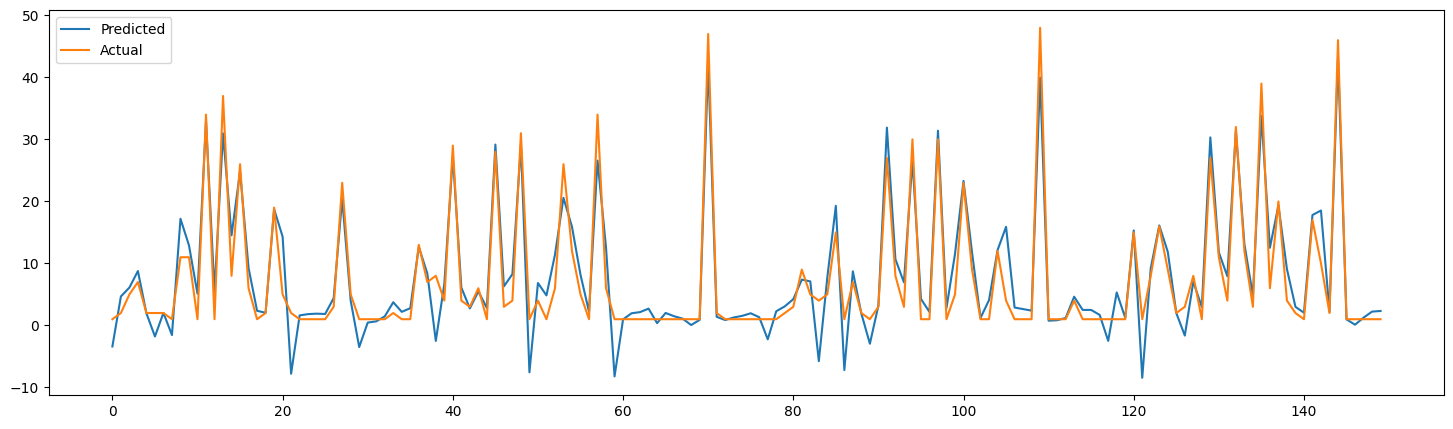

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(y_pred[:150])
plt.plot(np.array(y_test)[:150])
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

def evaluation_metric(actual,predict,feature):
  MSE  = mean_squared_error(actual, predict)
  RMSE = np.sqrt(MSE)
  r2 = r2_score(actual, predict)
  Adjusted_r2 = 1-(1-r2_score((actual), (predict)))*((feature.shape[0]-1)/(feature.shape[0]-feature.shape[1]-1))
  return {'MSE':MSE,'RMSE':RMSE,'r2':r2,'Adjusted r2':Adjusted_r2}

In [ ]:
mean_absolute_error(y_test,y_pred)

3.5765834613993746

In [ ]:
evaluation_metric(y_test,y_pred,X_test)

{'MSE': 29.262877561130413,
 'RMSE': 5.409517313137135,
 'r2': 0.7233684857279454,
 'Adjusted r2': 0.7113410285856823}

In [ ]:
eval_metric = pd.DataFrame({'metrics':['MSE','RMSE','r2','Adjusted r2']}).set_index('metrics')

In [ ]:
eval_metric['Training'] = evaluation_metric(y_train,y_train_pred,X_train)

In [ ]:
eval_metric['Test'] = evaluation_metric(y_test,y_pred,X_test)

In [ ]:
eval_metric

,Training,Test
metrics,,
MSE,8.071497,29.262878
RMSE,2.841038,5.409517
r2,0.880118,0.723368
Adjusted r2,0.879053,0.711341


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X_train):
  X_trainCV, X_testCV = X_train[train_index], X_train[test_index]
  y_trainCV, y_testCV = y_train[train_index], y_train[test_index]
  regCV = lr.fit(X_trainCV,y_trainCV)
  y_train_pred = regCV.predict(X_trainCV)
  y_pred = regCV.predict(X_testCV)
  print('---'*40)
  print('Train: ',X_trainCV.shape,y_trainCV.shape)
  print(evaluation_metric(y_trainCV,y_train_pred,X_trainCV))
  print('Test: ',X_testCV.shape,y_testCV.shape)
  print(evaluation_metric(y_testCV,y_pred,X_testCV))

------------------------------------------------------------------------------------------------------------------------
Train:  (835, 44) (835,)
{'MSE': 1.9677582605732685e-27, 'RMSE': 4.435942132820568e-14, 'r2': 1.0, 'Adjusted r2': 1.0}
Test:  (833, 44) (833,)
{'MSE': 149.52742388722436, 'RMSE': 12.228140655358212, 'r2': -1.038667430801373, 'Adjusted r2': -1.1525016528258152}
------------------------------------------------------------------------------------------------------------------------
Train:  (1668, 44) (1668,)
{'MSE': 1.315528680774164, 'RMSE': 1.1469649867254728, 'r2': 0.97898690756968, 'Adjusted r2': 0.9784172365487718}
Test:  (833, 44) (833,)
{'MSE': 7506081155994045.0, 'RMSE': 86637642.83493662, 'r2': -121207765788232.67, 'Adjusted r2': -127975712101281.27}
------------------------------------------------------------------------------------------------------------------------
Train:  (2501, 44) (2501,)
{'MSE': 6.986685181865844, 'RMSE': 2.643233849258488, 'r2': 0.8880

In [ ]:
# ML Model - 2 Implementation
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=20)
# Fit the Algorithm
ridge = ridge.fit(X_train,y_train)
print(ridge.score(X_train,y_train))
# Predict on the model
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

0.879117778347567


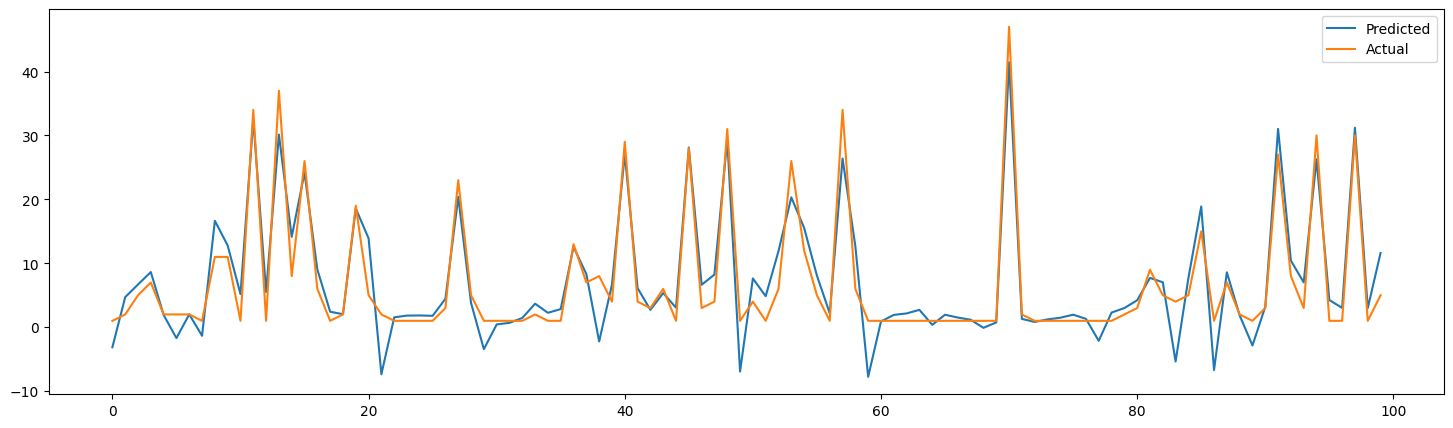

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(y_pred[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
evaluation_metric(y_train,y_train_pred,X_train)

{'MSE': 8.138837518152414,
 'RMSE': 2.852864791425001,
 'r2': 0.879117778347567,
 'Adjusted r2': 0.8780443539776968}

In [ ]:
evaluation_metric(y_test,y_pred,X_test)

{'MSE': 27.3825162770347,
 'RMSE': 5.232830618034058,
 'r2': 0.7411441534937455,
 'Adjusted r2': 0.7298895514717345}

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metric['Training_Ridge'] = evaluation_metric(y_train,y_train_pred,X_train)
eval_metric['Test_Ridge'] = evaluation_metric(y_test,y_pred,X_test)
eval_metric

,Training,Test,Training_Ridge,Test_Ridge
metrics,,,,
MSE,8.071497,29.262878,8.138838,27.382516
RMSE,2.841038,5.409517,2.852865,5.232831
r2,0.880118,0.723368,0.879118,0.741144
Adjusted r2,0.879053,0.711341,0.878044,0.729890


In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameter = {'alpha':[1e-15,1e-10,1e-5,1e-3,1e-2,1e-1,1,2,4,6,8,10,20,40,50,70,100,120,150,200,300,350,400]}
ridgeCV = GridSearchCV(estimator=ridge,param_grid=parameter,cv=tscv,verbose=3)
# Fit the Algorithm
ridgeCV = ridgeCV.fit(X_train,y_train)
print(ridgeCV.score(X_train,y_train))
# Predict on the model
y_train_pred = ridgeCV.predict(X_train)
y_pred = ridgeCV.predict(X_test)

Fitting 5 folds for each of 23 candidates, totalling 115 fits
[CV 1/5] END .......................alpha=1e-15;, score=0.805 total time=   0.0s
[CV 2/5] END ......................alpha=1e-15;, score=-2.028 total time=   0.0s
[CV 3/5] END .......................alpha=1e-15;, score=0.830 total time=   0.0s
[CV 4/5] END .......................alpha=1e-15;, score=0.865 total time=   0.0s
[CV 5/5] END .......................alpha=1e-15;, score=0.889 total time=   0.0s
[CV 1/5] END .......................alpha=1e-10;, score=0.807 total time=   0.0s
[CV 2/5] END ......................alpha=1e-10;, score=-2.028 total time=   0.0s
[CV 3/5] END .......................alpha=1e-10;, score=0.830 total time=   0.0s
[CV 4/5] END .......................alpha=1e-10;, score=0.865 total time=   0.0s
[CV 5/5] END .......................alpha=1e-10;, score=0.889 total time=   0.0s
[CV 1/5] END .......................alpha=1e-05;, score=0.805 total time=   0.0s
[CV 2/5] END ......................alpha=1e-05;

In [ ]:
ridgeCV.best_params_

{'alpha': 40}

In [ ]:
eval_metric['Training_RidgeCV'] = evaluation_metric(y_train,y_train_pred,X_train)
eval_metric['Test_RidgeCV'] = evaluation_metric(y_test,y_pred,X_test)
eval_metric

,Training,Test,Training_Ridge,Test_Ridge,Training_RidgeCV,Test_RidgeCV
metrics,,,,,,
MSE,8.071497,29.262878,8.138838,27.382516,8.312010,25.961450
RMSE,2.841038,5.409517,2.852865,5.232831,2.883056,5.095238
r2,0.880118,0.723368,0.879118,0.741144,0.876546,0.754578
Adjusted r2,0.879053,0.711341,0.878044,0.729890,0.875449,0.743907


In [ ]:
for train_index, test_index in tscv.split(X_train):
  X_trainCV, X_testCV = X_train[train_index], X_train[test_index]
  y_trainCV, y_testCV = y_train[train_index], y_train[test_index]
  ridge = Ridge(alpha=1)
  ridgeCV = ridge.fit(X_trainCV,y_trainCV)
  y_train_pred = ridgeCV.predict(X_trainCV)
  y_pred = ridgeCV.predict(X_testCV)
  print('---'*40)
  print('Train: ',X_trainCV.shape,y_trainCV.shape)
  print(evaluation_metric(y_trainCV,y_train_pred,X_trainCV))
  print('Test: ',X_testCV.shape,y_testCV.shape)
  print(evaluation_metric(y_testCV,y_pred,X_testCV))

------------------------------------------------------------------------------------------------------------------------
Train:  (835, 44) (835,)
{'MSE': 0.9921709582291256, 'RMSE': 0.9960777872380879, 'r2': 0.9808566393066407, 'Adjusted r2': 0.979790426812327}
Test:  (833, 44) (833,)
{'MSE': 3.181948153155672, 'RMSE': 1.7838016013995703, 'r2': 0.956617094726185, 'Adjusted r2': 0.9541946990002359}
------------------------------------------------------------------------------------------------------------------------
Train:  (1668, 44) (1668,)
{'MSE': 1.4082870042727202, 'RMSE': 1.1867126881738141, 'r2': 0.9775052680935953, 'Adjusted r2': 0.9768954293974266}
Test:  (833, 44) (833,)
{'MSE': 139.76049908596727, 'RMSE': 11.822034473218528, 'r2': -1.2568444821744218, 'Adjusted r2': -1.382861179148628}
------------------------------------------------------------------------------------------------------------------------
Train:  (2501, 44) (2501,)
{'MSE': 6.988839586998498, 'RMSE': 2.6436413

In [ ]:
# ML Model - 3 Implementation
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=5)
# Fit the Algorithm
dt_reg = dt.fit(X_train,y_train)
# Predict on the model
dt_reg.score(X_train, y_train)

0.7510772503567169

In [ ]:
y_pred_d = dt_reg.predict(X_test)
y_train_d = dt_reg.predict(X_train)

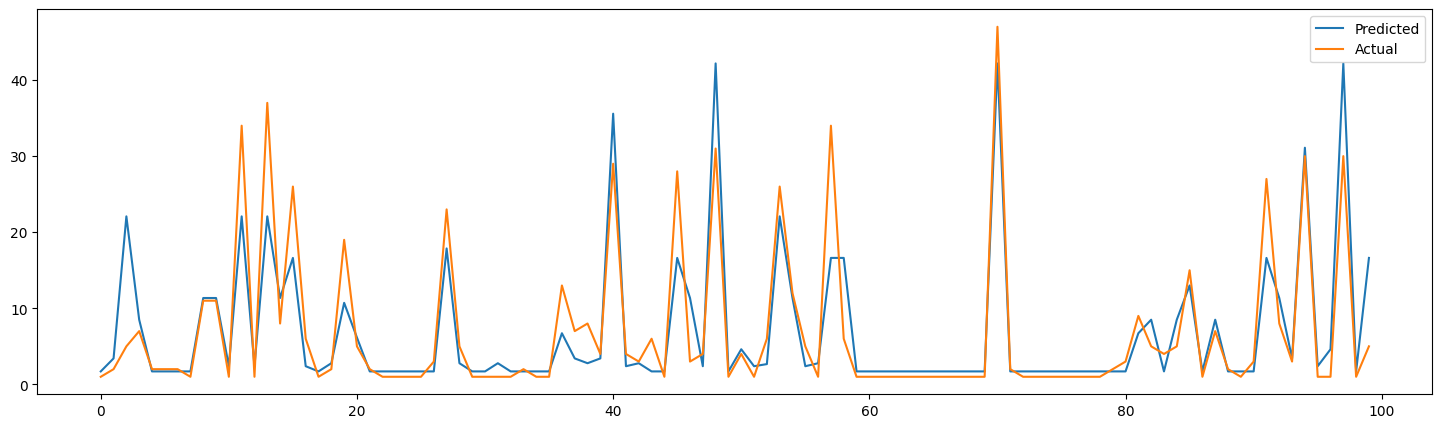

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(y_pred_d[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

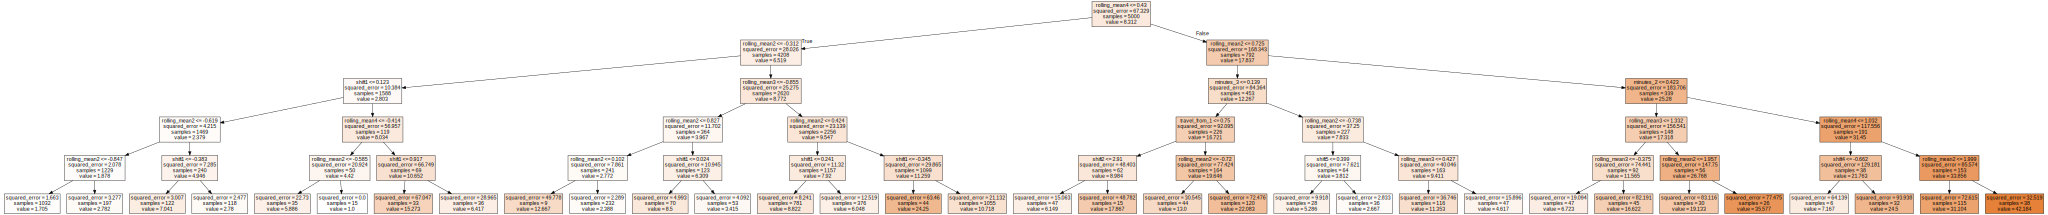

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(dt, out_file=None, feature_names=x.columns,filled = True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metric['Training_DecisionTree'] = evaluation_metric(y_train,y_train_d,X_train)
eval_metric['Test_DecisionTree'] = evaluation_metric(y_test,y_pred_d,X_test)
eval_metric

,Training,Test,Training_Ridge,Test_Ridge,Training_RidgeCV,Test_RidgeCV,Training_DecisionTree,Test_DecisionTree
metrics,,,,,,,,
MSE,8.071497,29.262878,8.138838,27.382516,8.312010,25.961450,16.759634,31.311251
RMSE,2.841038,5.409517,2.852865,5.232831,2.883056,5.095238,4.093853,5.595646
r2,0.880118,0.723368,0.879118,0.741144,0.876546,0.754578,0.751077,0.704005
Adjusted r2,0.879053,0.711341,0.878044,0.729890,0.875449,0.743907,0.748867,0.691135


In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
tree_reg = DecisionTreeRegressor()
parameter = {'max_depth':[5,6,7,8],
             'min_samples_leaf':[20,30,40,50,60,70,80]}
treeCV = GridSearchCV(estimator=tree_reg,param_grid=parameter,cv=tscv,verbose=2)
# Fit the Algorithm
treeCV.fit(X_train,y_train)
print(treeCV.score(X_train,y_train))
# Predict on the model
y_train_d = treeCV.predict(X_train)
y_pred_d = treeCV.predict(X_test)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END ...................max_depth=5, min_samples_leaf=20; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_leaf=20; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_leaf=20; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_leaf=20; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_leaf=20; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_leaf=30; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_leaf=30; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_leaf=30; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_leaf=30; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_leaf=30; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_leaf=40; total time=   0.0s
[CV] END ...................max_depth=5, min_sa

In [ ]:
treeCV.best_params_

{'max_depth': 8, 'min_samples_leaf': 20}

In [ ]:
eval_metric['Training_DecisionTreeCV'] = evaluation_metric(y_train,y_train_d,X_train)
eval_metric['Test_DecisionTreeCV'] = evaluation_metric(y_test,y_pred_d,X_test)
eval_metric

,Training,Test,Training_Ridge,Test_Ridge,Training_RidgeCV,Test_RidgeCV,Training_DecisionTree,Test_DecisionTree,Training_DecisionTreeCV,Test_DecisionTreeCV
metrics,,,,,,,,,,
MSE,8.071497,29.262878,8.138838,27.382516,8.312010,25.961450,16.759634,31.311251,11.634588,28.007236
RMSE,2.841038,5.409517,2.852865,5.232831,2.883056,5.095238,4.093853,5.595646,3.410951,5.292186
r2,0.880118,0.723368,0.879118,0.741144,0.876546,0.754578,0.751077,0.704005,0.827197,0.735238
Adjusted r2,0.879053,0.711341,0.878044,0.729890,0.875449,0.743907,0.748867,0.691135,0.825663,0.723727


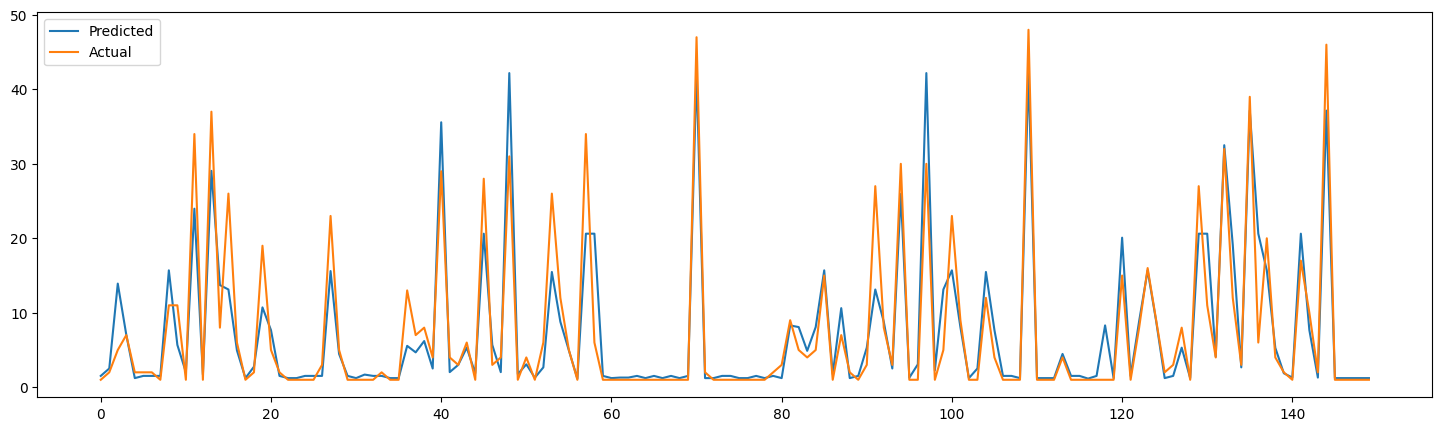

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(y_pred_d[:150])
plt.plot(np.array(y_test)[:150])
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()
parameter = {'alpha':[1e-15,1e-10,1e-5,1e-3,1e-2,1e-1,1,2,4,6,8,10,20,40,50,70,100,120,150,200]}
lassoCV = GridSearchCV(estimator=lasso,param_grid=parameter,verbose=3,cv=tscv)
# Fit the Algorithm
lassoCV = lassoCV.fit(X_train,y_train)
print(lassoCV.score(X_train,y_train))
# Predict on the model
y_train_pred = ridgeCV.predict(X_train)
y_pred = ridgeCV.predict(X_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .......................alpha=1e-15;, score=0.885 total time=   0.1s
[CV 2/5] END ......................alpha=1e-15;, score=-2.121 total time=   0.1s
[CV 3/5] END .......................alpha=1e-15;, score=0.830 total time=   0.2s
[CV 4/5] END .......................alpha=1e-15;, score=0.865 total time=   0.5s
[CV 5/5] END .......................alpha=1e-15;, score=0.890 total time=   0.6s
[CV 1/5] END .......................alpha=1e-10;, score=0.885 total time=   0.1s
[CV 2/5] END ......................alpha=1e-10;, score=-2.121 total time=   0.2s
[CV 3/5] END .......................alpha=1e-10;, score=0.830 total time=   0.3s
[CV 4/5] END .......................alpha=1e-10;, score=0.865 total time=   0.5s
[CV 5/5] END .......................alpha=1e-10;, score=0.890 total time=   0.7s
[CV 1/5] END .......................alpha=1e-05;, score=0.885 total time=   0.1s
[CV 2/5] END ......................alpha=1e-05;

In [ ]:
lassoCV.best_params_

{'alpha': 0.1}

In [ ]:
lasso=Lasso(alpha=0.1)
lasso = lasso.fit(X_train,y_train)

In [ ]:
pd.DataFrame(list(zip(consider_features,lasso.coef_)),columns=['features','coefficient']).sort_values(by=('coefficient'))

,features,coefficient
32,shift1,-6.815868
1,travel_from_2,-6.316131
42,rolling_mean5,-3.484208
40,rolling_mean3,-0.692450
30,minutes_3,-0.316842
36,shift5,-0.183569
37,shift6,-0.178936
26,hour_2,-0.166602
25,hour_1,-0.160981
43,__shuttle,-0.149495


In [ ]:
y_pred_d = lasso.predict(X_test)
y_train_d = lasso.predict(X_train)

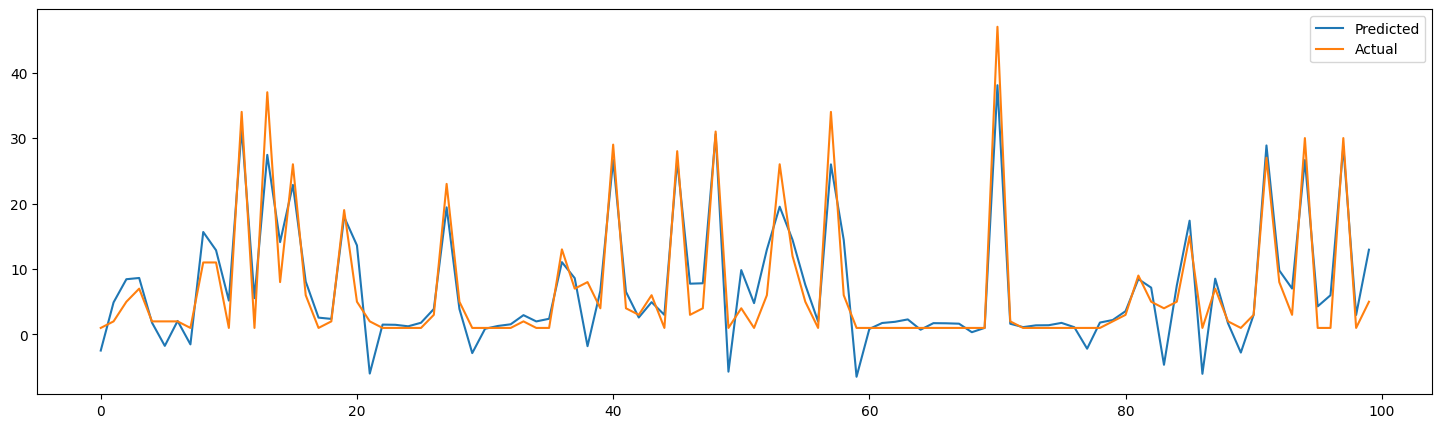

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(y_pred_d[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
eval_metric['Training_lassoCV'] = evaluation_metric(y_train,y_train_d,X_train)
eval_metric['Test_lassoCV'] = evaluation_metric(y_test,y_pred_d,X_test)
eval_metric

,Training,Test,Training_Ridge,Test_Ridge,Training_RidgeCV,Test_RidgeCV,Training_DecisionTree,Test_DecisionTree,Training_DecisionTreeCV,Test_DecisionTreeCV,Training_lassoCV,Test_lassoCV
metrics,,,,,,,,,,,,
MSE,8.071497,29.262878,8.138838,27.382516,8.312010,25.961450,16.759634,31.311251,11.634588,28.007236,9.250953,25.255438
RMSE,2.841038,5.409517,2.852865,5.232831,2.883056,5.095238,4.093853,5.595646,3.410951,5.292186,3.041538,5.025479
r2,0.880118,0.723368,0.879118,0.741144,0.876546,0.754578,0.751077,0.704005,0.827197,0.735238,0.862600,0.761252
Adjusted r2,0.879053,0.711341,0.878044,0.729890,0.875449,0.743907,0.748867,0.691135,0.825663,0.723727,0.861380,0.750872
